<a href="https://colab.research.google.com/github/Gowtham-M-R/Sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

  >>> import nltk
  >>> nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/Movie_Review.csv')

sid = SentimentIntensityAnalyzer()

def classify_sentiment(review):
    scores = sid.polarity_scores(review)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'average'

df['sentiment'] = df['text'].apply(classify_sentiment)

sentiment_counts = df['sentiment'].value_counts()

total_reviews = len(df)

positive_percentage = (sentiment_counts.get('positive', 0) / total_reviews) * 100
negative_percentage = (sentiment_counts.get('negative', 0) / total_reviews) * 100
average_percentage = (sentiment_counts.get('average', 0) / total_reviews) * 100

print(f"Percentage of Positive Reviews: {positive_percentage:.2f}%")
print(f"Percentage of Negative Reviews: {negative_percentage:.2f}%")
print(f"Percentage of Average Reviews: {average_percentage:.2f}%")


Percentage of Positive Reviews: 65.70%
Percentage of Negative Reviews: 33.90%
Percentage of Average Reviews: 0.40%


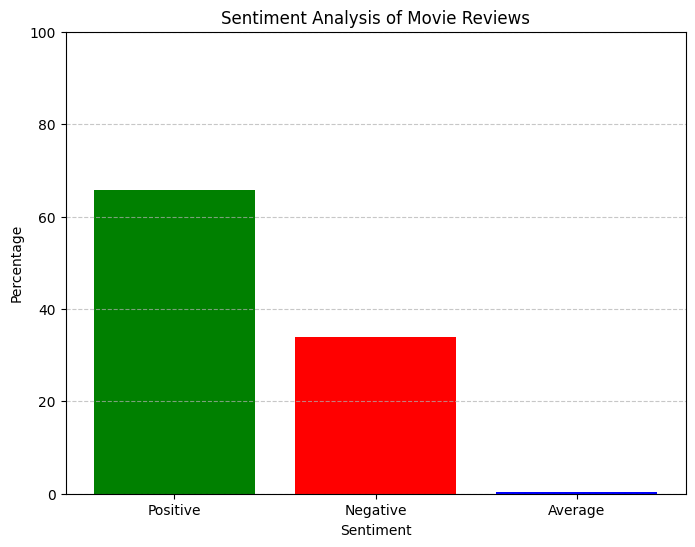

In [5]:
sentiments = ['Positive', 'Negative', 'Average']
percentages = [positive_percentage, negative_percentage, average_percentage]

plt.figure(figsize=(8, 6))
plt.bar(sentiments, percentages, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis of Movie Reviews')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

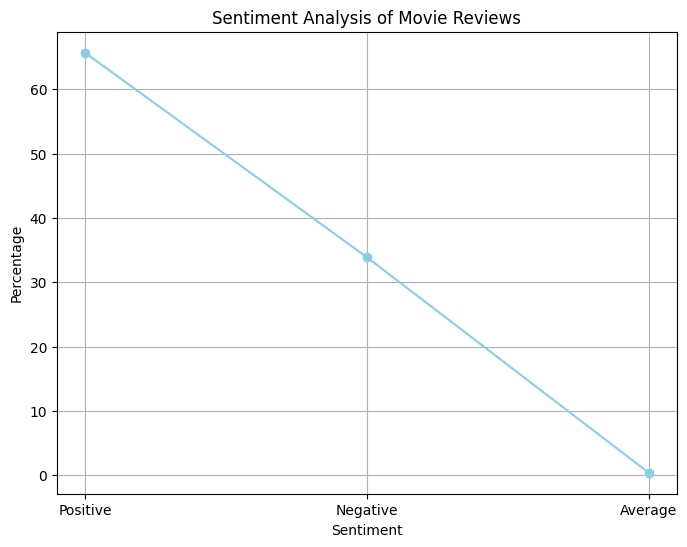

In [6]:
plt.figure(figsize=(8, 6))
x_pos = np.arange(len(sentiments))
plt.plot(x_pos, percentages, marker='o', linestyle='-', color='skyblue')
plt.xticks(x_pos, sentiments)
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis of Movie Reviews')
plt.grid(True)
plt.show()
